# Seaborn KDE example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sbn

In [2]:
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['savefig.format'] = 'jpg'

seaborn's kdeplot makes much nicer contour plots than matplotlib plt.contour, quick demo and comparison

In [3]:
sbn.set()
infile = "plot_testdata.txt"
data = np.loadtxt(infile)
sz = data[:,0]
pz = data[:,1]
szsubset = sz[::2] #grab half of the data so plot isn't overcrowded
pzsubset = pz[::2]
print (len(szsubset))

19968


CPU times: user 13.2 s, sys: 189 ms, total: 13.4 s
Wall time: 13.5 s


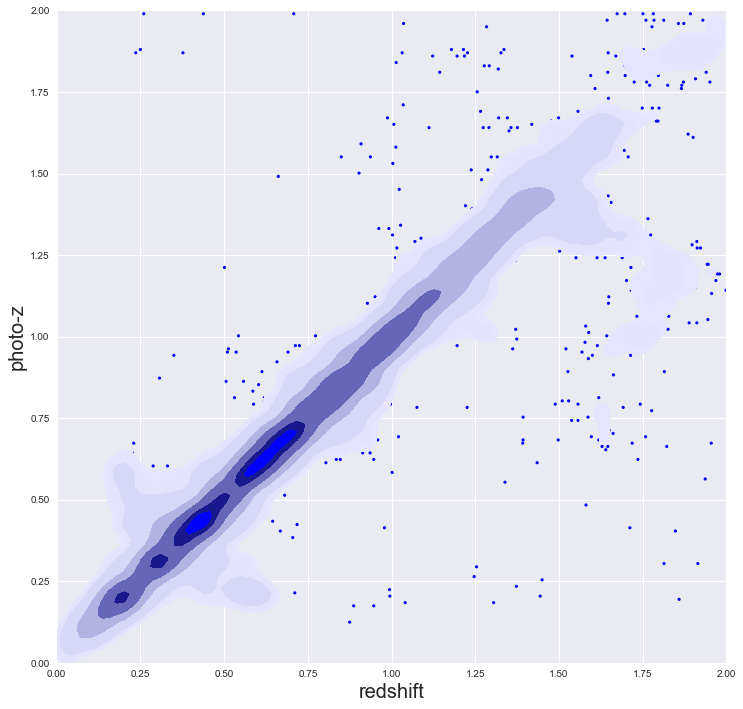

In [4]:
%%time
contourlevels = [0.0,0.05,0.075,0.15,1.0,3.0,7.0,9.0]
pal = sbn.light_palette("navy", as_cmap=True)
fig = plt.figure()
plt.scatter(szsubset,pzsubset,marker='o',c='b',edgecolor='None',s=10)
sbn.kdeplot(szsubset,pzsubset,shade=True,shade_lowest=False,levels=contourlevels,gridsize=100,cmap=pal,bw=(0.025,0.025))
plt.xlim([0.,2.])
plt.ylim([0.,2.])
plt.xlabel("redshift",fontsize=20)
plt.ylabel("photo-z",fontsize=20)

Note that it is pretty slow, since it's performing a kernel density estimate over a grid.  I set the bandwidth by hand, but the default uses Scott's rule, and generally also looks good.<br>
Compare to the matplotlib contour plot made from a hist2d run (notice it runs much faster, though, >30 seconds vs half a second on my laptop for 20,000 points!)

CPU times: user 42.5 ms, sys: 3.23 ms, total: 45.7 ms
Wall time: 43 ms


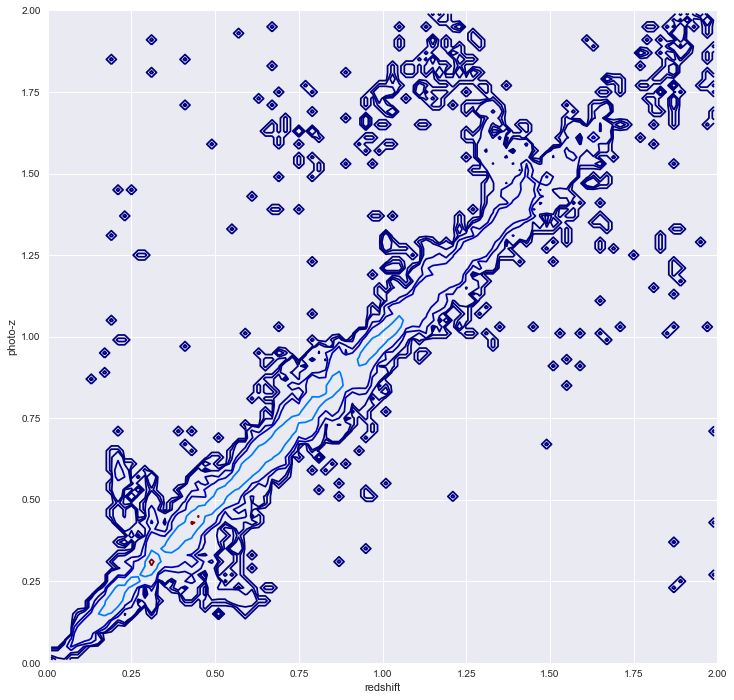

In [5]:
%%time
conts,xx,yy = np.histogram2d(szsubset,pzsubset,bins=100,range=[[0.,2.],[0.,2.]])
bincents = 0.5*(xx[1:]+xx[:-1])
xxx,yyy=np.meshgrid(bincents,bincents)
fig = plt.figure()
contlevels = [0.25,.75,1.25,5.,10.,50.,200.]
plt.contour(xxx,yyy,conts,contlevels,cmap='jet')
plt.xlim([0.,2.])
plt.ylim([0.,2.])
plt.xlabel("redshift")
plt.ylabel("photo-z")